# Bibliotecas

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
#!pip install nltk
import sys
from nlp_toolbox import preprocessing as prep
import re

sys.path.append('D:\\Data Scientist\\NLP')

In [52]:
def just_string(x):
    
    try:
    
        y = " ".join(re.findall("[a-zA-Z]+", x))
        
        return y

    except:
    
        return np.nan

In [53]:
df = pd.read_csv('db_consumo_categorias - cartao_credito.csv',decimal=',')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Categoria   690 non-null    object 
 1   Data        691 non-null    object 
 2   Lançamento  690 non-null    object 
 3   Valor (R$)  608 non-null    object 
 4   Valor ()    83 non-null     float64
dtypes: float64(1), object(4)
memory usage: 27.1+ KB


In [55]:
df

,Categoria,Data,Lançamento,Valor (R$),Valor ()
0,Aluguel,19/08/2022,Quintoandar 05/05,45.8,NaN
1,Utilidade Casa,09/09/2022,Leroy Merlin 04/04,109.73,NaN
2,Planos,11/09/2022,Elaza Comercial Va04/10,290.0,NaN
3,Eletrônico,13/09/2022,Aliexpress 04/06,20.87,NaN
4,Eletrônico,13/09/2022,Aliexpress 04/06,22.6,NaN
...,...,...,...,...,...
686,Assinatura,12/02/2023,Amazonprimebr,NaN,15.0
687,Assinatura,13/02/2023,Google Storage,NaN,35.0
688,Restaurante,16/02/2023,Market4u*compra*118685,NaN,3.0
689,Assinatura,19/02/2023,Google Youtubepremium,NaN,21.0


In [50]:
# Tratamento Dataframe

df['Valor (R$)'] = np.where(df['Valor (R$)'].isnull(), df['Valor ()'],df['Valor (R$)'])

df.drop(columns='Valor ()',inplace=True)

df['Lançamento'] = df['Lançamento'].astype('string')
df['Valor (R$)'] = df['Valor (R$)'].astype('float64')

In [62]:
df['Lançamento'] 

0                quintoandar
1               leroy merlin
2         elaza comercial va
3                 aliexpress
4                 aliexpress
               ...          
686            amazonprimebr
687           google storage
688          market u compra
689    google youtubepremium
690          market u compra
Name: Lançamento, Length: 691, dtype: object

In [63]:
#Tratamento pré treino

df['Lançamento'] = df['Lançamento'].apply(just_string)

df[['Lançamento','Categoria']] = df[['Lançamento','Categoria']].applymap(lambda x: x.lower() if type(x) != float else np.nan)

# Fast EDA

In [14]:
df.Categoria.value_counts()

Alimentação        122
Restaurante         92
Assinatura          60
Planos              59
Utilidade Casa      58
Eletrônico          50
Outros              40
Pet                 36
Produtos Saúde      25
Vestimenta          22
Locomoção           20
Manutenção          15
Exterior            12
Estacionamento      12
Seguro              10
Ferramentas          8
Necessários          7
Celular              7
Livros               7
Combustível          7
Internet             5
Aluguel              4
Presentes            4
Opcionais            3
Telefone             2
Viagem               2
Higiene Pessoal      1
Name: Categoria, dtype: int64

In [40]:
df.groupby('Categoria').mean()

C:\Users\rodri\AppData\Local\Temp\ipykernel_15640\727449858.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Categoria').mean()


,Valor (R$),Valor ()
Categoria,,
alimentação,55.673689,78.928571
aluguel,45.800000,NaN
assinatura,30.374500,28.000000
celular,26.134286,30.000000
combustível,118.438571,161.000000
eletrônico,40.003400,33.875000
estacionamento,21.583333,37.500000
exterior,58.228333,NaN
ferramentas,39.751250,60.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Categoria   690 non-null    object 
 1   Data        691 non-null    object 
 2   Lançamento  690 non-null    string 
 3   Valor (R$)  608 non-null    float64
 4   Valor ()    83 non-null     float64
dtypes: float64(2), object(2), string(1)
memory usage: 27.1+ KB


In [20]:
df['Lançamento'] 

0                quintoandar
1               leroy merlin
2         elaza comercial va
3                 aliexpress
4                 aliexpress
               ...          
686            amazonprimebr
687           google storage
688          market u compra
689    google youtubepremium
690          market u compra
Name: Lançamento, Length: 691, dtype: object

In [21]:
df.shape

(691, 5)

In [23]:
df['Categoria']

0             aluguel
1      utilidade casa
2              planos
3          eletrônico
4          eletrônico
            ...      
686        assinatura
687        assinatura
688       restaurante
689        assinatura
690       restaurante
Name: Categoria, Length: 691, dtype: object

In [24]:
df

,Categoria,Data,Lançamento,Valor (R$),Valor ()
0,aluguel,19/08/2022,quintoandar,45.80,NaN
1,utilidade casa,09/09/2022,leroy merlin,109.73,NaN
2,planos,11/09/2022,elaza comercial va,290.00,NaN
3,eletrônico,13/09/2022,aliexpress,20.87,NaN
4,eletrônico,13/09/2022,aliexpress,22.60,NaN
...,...,...,...,...,...
686,assinatura,12/02/2023,amazonprimebr,NaN,15.0
687,assinatura,13/02/2023,google storage,NaN,35.0
688,restaurante,16/02/2023,market u compra,NaN,3.0
689,assinatura,19/02/2023,google youtubepremium,NaN,21.0


<AxesSubplot: xlabel='Valor (R$)', ylabel='Categoria'>

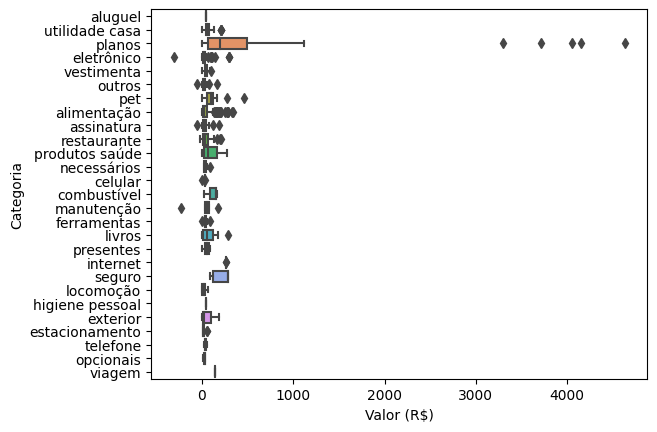

In [26]:
sns.boxplot(df,x='Valor (R$)',y='Categoria')

# Model

In [27]:
df_model = df[['Lançamento','Categoria','Valor (R$)']].dropna()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_model[['Lançamento','Valor (R$)']], df_model['Categoria'], test_size=0.3, random_state=0)

In [29]:
X_train

,Lançamento,Valor (R$)
597,market u compra,3.99
303,lojao de var ct des,66.40
204,pag josecarlosdeaguia,2.00
351,pao pao queijo queij,87.67
118,ifood ifood,50.96
...,...,...
359,pag thiagodiasmoretti,32.00
192,kinvo,59.95
630,conta vivo,260.00
560,cornershop brasil tecn,121.34


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(2, 2)

In [32]:
X_train_cv

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [33]:
pd.DataFrame(X_train_cv.toarray()).isnull().sum()

0    0
1    0
dtype: int64

In [34]:
X_train

,Lançamento,Valor (R$)
597,market u compra,3.99
303,lojao de var ct des,66.40
204,pag josecarlosdeaguia,2.00
351,pao pao queijo queij,87.67
118,ifood ifood,50.96
...,...,...
359,pag thiagodiasmoretti,32.00
192,kinvo,59.95
630,conta vivo,260.00
560,cornershop brasil tecn,121.34


In [35]:
X_test

,Lançamento,Valor (R$)
14,ifood ifood,58.50
587,amazon marketplace,22.50
140,mercadolivre mercadol,-0.10
493,google youtube member,2.99
350,pasteis de belem,39.66
...,...,...
188,d lar de convers o,5.78
381,google play,13.74
369,mercadolivre mercadol,229.70
362,brinox brinoxshop,615.25


In [36]:
X_test_ct.toarray()

NameError: name 'X_test_ct' is not defined

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

# create the column transformer to apply CountVectorizer to the 'categoria' column
ct = ColumnTransformer(
        transformers=[('cv', CountVectorizer(), 'Lançamento')],
        remainder='passthrough')



# fit the column transformer to the training data and transform X_train_cv
X_train_ct = ct.fit_transform(X_train)

# transform X_test using the fitted column transformer
X_test_ct = ct.transform(X_test)

# create the logistic regression model and fit it to the training data
lr = LogisticRegression()
lr.fit(X_train_ct, y_train)

# generate predictions using the fitted model and the transformed X_test data
predictions = lr.predict(X_test_ct)

# print the predictions
print(predictions)


['restaurante' 'utilidade casa' 'outros' 'assinatura' 'restaurante'
 'eletrônico' 'produtos saúde' 'utilidade casa' 'alimentação' 'assinatura'
 'utilidade casa' 'utilidade casa' 'utilidade casa' 'utilidade casa'
 'produtos saúde' 'planos' 'restaurante' 'alimentação' 'restaurante'
 'utilidade casa' 'assinatura' 'outros' 'alimentação' 'eletrônico' 'pet'
 'utilidade casa' 'alimentação' 'eletrônico' 'alimentação' 'restaurante'
 'utilidade casa' 'alimentação' 'restaurante' 'assinatura' 'alimentação'
 'restaurante' 'restaurante' 'pet' 'utilidade casa' 'outros' 'eletrônico'
 'planos' 'utilidade casa' 'alimentação' 'utilidade casa' 'assinatura'
 'restaurante' 'assinatura' 'assinatura' 'restaurante' 'utilidade casa'
 'restaurante' 'restaurante' 'alimentação' 'planos' 'alimentação'
 'eletrônico' 'planos' 'alimentação' 'restaurante' 'alimentação' 'planos'
 'restaurante' 'planos' 'restaurante' 'restaurante' 'planos' 'seguro'
 'assinatura' 'restaurante' 'restaurante' 'restaurante' 'planos' 'pet'
 '

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)


# transform X_test using CV

X_test_cv = cv.transform(X_test.dropna())




# generate predictions

predictions = lr.predict(X_test_cv)

predictions

array(['alimentação', 'alimentação'], dtype=object)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test.sort_values().unique()

array(['alimentação', 'aluguel', 'assinatura', 'celular', 'combustível',
       'eletrônico', 'estacionamento', 'exterior', 'ferramentas',
       'internet', 'livros', 'locomoção', 'manutenção', 'necessários',
       'outros', 'pet', 'planos', 'presentes', 'produtos saúde',
       'restaurante', 'seguro', 'utilidade casa', 'vestimenta', 'viagem'],
      dtype=object)

In [ ]:
print(classification_report(y_test, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [207, 2]

In [ ]:
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

   alimentação       0.49      0.94      0.65        34
       aluguel       0.50      1.00      0.67         1
    assinatura       0.89      0.76      0.82        21
       celular       1.00      1.00      1.00         1
   combustível       1.00      1.00      1.00         1
    eletrônico       0.79      0.88      0.83        17
estacionamento       0.50      0.60      0.55         5
      exterior       1.00      1.00      1.00         3
   ferramentas       0.00      0.00      0.00         1
      internet       1.00      1.00      1.00         1
        livros       0.00      0.00      0.00         3
     locomoção       0.86      0.67      0.75         9
    manutenção       0.00      0.00      0.00         4
   necessários       0.00      0.00      0.00         2
        outros       0.60      0.33      0.43         9
           pet       1.00      0.60      0.75        10
        planos       0.58      0.48      0.52  

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#!pip install matplotlib

In [ ]:
y_test.sort_values().unique()

array(['alimentação', 'aluguel', 'assinatura', 'celular', 'combustível',
       'eletrônico', 'estacionamento', 'exterior', 'ferramentas',
       'internet', 'livros', 'locomoção', 'manutenção', 'necessários',
       'outros', 'pet', 'planos', 'presentes', 'produtos saúde',
       'restaurante', 'seguro', 'utilidade casa', 'vestimenta', 'viagem'],
      dtype=object)

In [ ]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=y_test.sort_values().unique(), columns=y_test.sort_values().unique())

<AxesSubplot: >

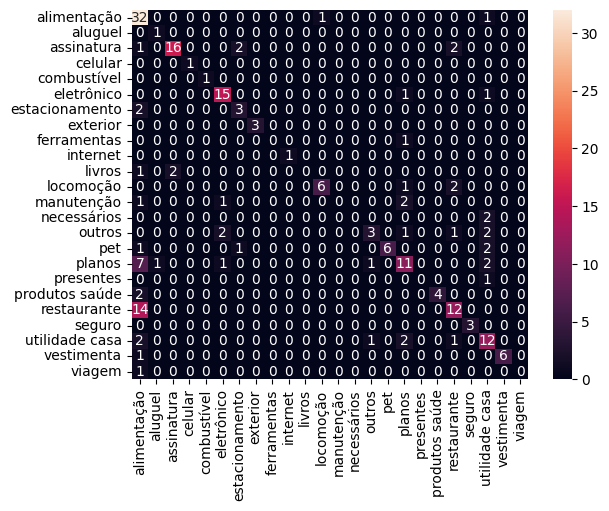

In [ ]:
sns.heatmap(df,annot=True)

In [ ]:
y_test

14     restaurante
587    necessários
140     eletrônico
493     assinatura
350       exterior
          ...     
188      locomoção
381     assinatura
369         planos
362         planos
90      vestimenta
Name: Categoria, Length: 207, dtype: object

In [ ]:
X_test

14               ifood ifood
587       amazon marketplace
140    mercadolivre mercadol
493    google youtube member
350         pasteis de belem
               ...          
188       d lar de convers o
381              google play
369    mercadolivre mercadol
362        brinox brinoxshop
90           lojas renner fl
Name: Lançamento, Length: 207, dtype: object

In [ ]:
cv.transform(['ifood'])

<1x310 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
lr.predict(cv.transform(['']))

array(['alimentação'], dtype=object)